In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as st

In [16]:
comb = pd.read_csv("log_safe/minigrid_green_blue-42-mask-linear_comb/230706-121833/eval_data.csv", header=None)
random = pd.read_csv("log_safe/minigrid_green_blue-42-mask-random/230706-151708/eval_data.csv", header=None)
big_mask = pd.read_csv("log_safe/minigrid_one_big_mask-42-mask-linear_comb/230706-162716/eval_data.csv", header=None)
ewc = pd.read_csv("log_safe/minigrid_green_blue_ewc-42-mask-ewc_multi_head/230906-203855/eval_data.csv", header=None)

comb_conf = pd.read_csv("log_safe/minigrid_green_blue-42-mask-linear_comb/230706-121833/conf_data.csv", header=None)
random_conf = pd.read_csv("log_safe/minigrid_green_blue-42-mask-random/230706-151708/conf_data.csv", header=None)
big_mask_conf = pd.read_csv("log_safe/minigrid_one_big_mask-42-mask-linear_comb/230706-162716/conf_data.csv", header=None)
ewc_conf = pd.read_csv("log_safe/minigrid_green_blue_ewc-42-mask-ewc_multi_head/230906-203855/conf_data.csv", header=None)

comb_all = pd.read_csv("log_safe/minigrid_green_blue-42-mask-linear_comb/230706-153712/eval_data.csv", header=None)
random_all = pd.read_csv("log_safe/minigrid_green_blue-42-mask-random/230906-113007/eval_data.csv", header=None)
big_mask_all = pd.read_csv("log_safe/minigrid_one_big_mask-42-mask-linear_comb/230906-110545/eval_data.csv", header=None)
ewc_all = pd.read_csv("log_safe/minigrid_green_blue_ewc-42-mask-ewc_multi_head/230906-203948/eval_data.csv", header=None)

independent_all = pd.read_csv("log_safe/minigrid_green_blue_independent-42-mask-linear_comb/230722-101822/eval_data.csv", header=None)

comb_all_sem = pd.read_csv("log_safe/minigrid_green_blue-42-mask-linear_comb/230706-153712/sem_data.csv", header=None)
random_all_sem = pd.read_csv("log_safe/minigrid_green_blue-42-mask-random/230906-113007/sem_data.csv", header=None)
big_mask_all_sem = pd.read_csv("log_safe/minigrid_one_big_mask-42-mask-linear_comb/230906-110545/sem_data.csv", header=None)
ewc_all_sem = pd.read_csv("log_safe/minigrid_green_blue_ewc-42-mask-ewc_multi_head/230906-203948/sem_data.csv", header=None)

independent_all_sem = pd.read_csv("log_safe/minigrid_green_blue_independent-42-mask-linear_comb/230722-101822/sem_data.csv", header=None)

extract_comb = pd.read_csv("log_safe/minigrid_green_blue_extract-42-mask-linear_comb/230724-112207/eval_data.csv", header=None)
extract_random = pd.read_csv("log_safe/minigrid_green_blue_extract-42-mask-random/230910-105143/eval_data.csv", header=None)
extract_big_mask = pd.read_csv("log_safe/minigrid_green_blue_big_mask_extract-42-mask-linear_comb/230910-105443/eval_data.csv", header=None)
extract_ewc = pd.read_csv("log_safe/minigrid_green_blue_extract_ewc-42-mask-ewc_multi_head/230910-120732/eval_data.csv", header=None)

extract_comb_sem = pd.read_csv("log_safe/minigrid_green_blue_extract-42-mask-linear_comb/230724-112207/sem_data.csv", header=None)
extract_random_sem = pd.read_csv("log_safe/minigrid_green_blue_extract-42-mask-random/230910-105143/sem_data.csv", header=None)
extract_big_mask_sem = pd.read_csv("log_safe/minigrid_green_blue_big_mask_extract-42-mask-linear_comb/230910-105443/sem_data.csv", header=None)
extract_ewc_sem = pd.read_csv("log_safe/minigrid_green_blue_extract_ewc-42-mask-ewc_multi_head/230910-120732/sem_data.csv", header=None)

In [9]:
def values_for_task(df, task_idx):
    calc_task_idx = lambda eval_idx: math.floor(eval_idx * 20 * 512 / 300000)

    n_rows = df.shape[0]
    task_indices = np.array([calc_task_idx(i) for i in range(n_rows)])

    values = df.iloc[task_indices == task_idx, task_idx]
    return values

def avg_values_for_task(df, task_idx):
    values = values_for_task(df, task_idx)
    return values.sum() / len(values)

avg_values_for_task(comb, 3)
    

0.7187266666666666

In [4]:
diff_random = [] 
diff_big_mask = [] 
diff_ewc = []

for i in range(4):
    avg_comb = avg_values_for_task(comb, i)
    avg_random = avg_values_for_task(random, i)
    avg_big_mask = avg_values_for_task(big_mask, i)
    avg_ewc = avg_values_for_task(ewc, i)
    diff_random.append(avg_comb - avg_random)
    diff_big_mask.append(avg_comb - avg_big_mask)
    diff_ewc.append(avg_comb - avg_ewc)
    print("Task:", i + 1)
    print("Diff random:", diff_random[i])
    print("Diff big mask:", diff_big_mask[i])
    print("Diff ewc:", diff_ewc[i])
    print("---")

Task: 1
Diff random: -0.008849999999999913
Diff big mask: 0.0
Diff ewc: 0.0033133333333332793
---
Task: 2
Diff random: 0.05776206896551728
Diff big mask: 0.016720689655172594
Diff ewc: 0.33351379310344836
---
Task: 3
Diff random: 0.03655172413793084
Diff big mask: 0.018786206896551527
Diff ewc: 0.3881517241379309
---
Task: 4
Diff random: 0.2709466666666666
Diff big mask: 0.012019999999999809
Diff ewc: 0.5438733333333333
---


In [23]:
diff_random_all = []
diff_big_mask_all = []
diff_ewc_all = []
diff_independent_all = []

for i in range(9):
    avg_comb_all = avg_values_for_task(comb_all, i)
    avg_random_all = avg_values_for_task(random_all, i)
    avg_big_mask_all = avg_values_for_task(big_mask_all, i)
    avg_ewc_all = avg_values_for_task(ewc_all, i)
    avg_independent_all = avg_values_for_task(independent_all, i)
    diff_random_all.append(avg_comb_all - avg_random_all)
    diff_big_mask_all.append(avg_comb_all - avg_big_mask_all)
    diff_ewc_all.append(avg_comb_all - avg_ewc_all)
    diff_independent_all.append(avg_comb_all - avg_independent_all)
    print("Task:", i + 1)
    print("Diff random:", diff_random_all[i])
    print("Diff big mask:", diff_big_mask_all[i])
    print("Diff ewc:", diff_ewc_all[i])
    print("Diff independent:", diff_independent_all[i])
    print("---")

Task: 1
Diff random: -0.0043799999999999395
Diff big mask: 0.000280000000000169
Diff ewc: -0.013946666666666552
Diff independent: 0.000280000000000169
---
Task: 2
Diff random: 0.014017241379310375
Diff big mask: -0.015913793103447982
Diff ewc: 0.3096655172413794
Diff independent: 0.011062068965517424
---
Task: 3
Diff random: -0.034062068965517334
Diff big mask: 0.09385517241379304
Diff ewc: 0.11586551724137928
Diff independent: -0.0029172413793103757
---
Task: 4
Diff random: -0.00682000000000027
Diff big mask: 0.0037166666666665904
Diff ewc: 0.31304333333333323
Diff independent: -0.003790000000000071
---
Task: 5
Diff random: -0.03972413793103424
Diff big mask: 0.04893793103448274
Diff ewc: 0.27707931034482763
Diff independent: -0.02932758620689646
---
Task: 6
Diff random: 0.15908275862068966
Diff big mask: 0.2101172413793102
Diff ewc: 0.40409310344827576
Diff independent: -0.031213793103448295
---
Task: 7
Diff random: 0.04714666666666667
Diff big mask: 0.08402000000000004
Diff ewc: 0.2

In [35]:
diff_extract_random = [] 
diff_extract_big_mask = [] 
diff_extract_ewc = []

for i in range(5):
    avg_comb = avg_values_for_task(extract_comb, i)
    avg_random = avg_values_for_task(extract_random, i)
    avg_big_mask = avg_values_for_task(extract_big_mask, i)
    avg_ewc = avg_values_for_task(extract_ewc, i)
    diff_extract_random.append(avg_comb - avg_random)
    diff_extract_big_mask.append(avg_comb - avg_big_mask)
    diff_extract_ewc.append(avg_comb - avg_ewc)
    print("Task:", i + 1)
    print("Diff random:", diff_extract_random[i])
    print("Diff big mask:", diff_extract_big_mask[i])
    print("Diff ewc:", diff_extract_ewc[i])
    print("---")

Task: 1
Diff random: 0.0067466666666664565
Diff big mask: 0.0
Diff ewc: 0.00629999999999975
---
Task: 2
Diff random: 0.049096551724137905
Diff big mask: -0.009786206896551797
Diff ewc: 0.3860034482758621
---
Task: 3
Diff random: -0.011210344827586205
Diff big mask: 0.1553862068965518
Diff ewc: 0.28682413793103456
---
Task: 4
Diff random: -0.12834666666666666
Diff big mask: 0.23584666666666665
Diff ewc: 0.19146333333333332
---
Task: 5
Diff random: -0.10449655172413791
Diff big mask: 0.14481379310344833
Diff ewc: 0.038051724137931064
---


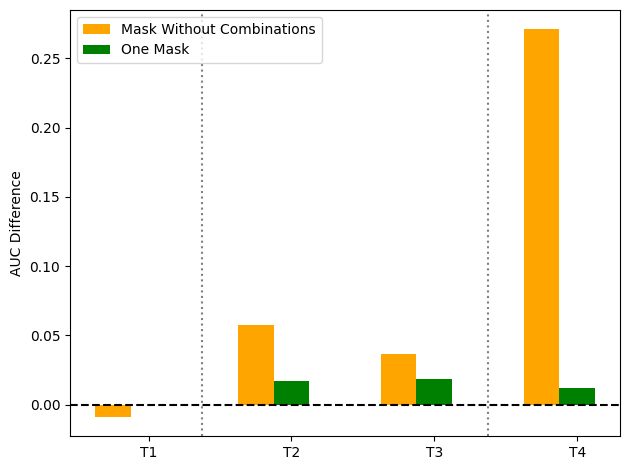

In [11]:
num_values = len(diff_random)
x = np.arange(num_values)

width = 0.25
fig, ax = plt.subplots()

ax.bar(x, diff_random, width, label="Mask Without Combinations", color='orange')
ax.bar(x + width, diff_big_mask, width, label="One Mask", color='green')

# Set x-axis labels for each group
ax.set_xticks(x + width)
ax.set_xticklabels([f'T{i + 1}' for i in range(num_values)])

# Add a horizontal line at y=0
ax.axhline(0, color='black', linestyle='--')
# Add a vertical line to seperate base and complex tasks
ax.axvline(0.625, color='gray', linestyle=':')
ax.axvline(2.625, color='gray', linestyle=':')

# Add legends and labels
ax.legend(loc='upper left')
ax.set_ylabel('AUC Difference')

plt.tight_layout()
plt.savefig("log_safe/comparisons/auc_diff_small.png")
plt.show()

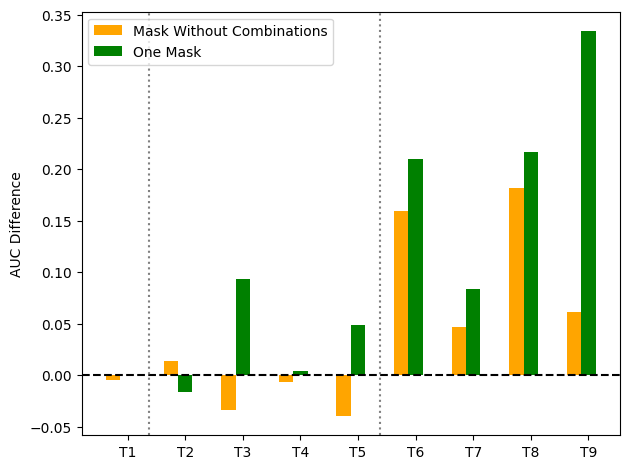

In [40]:
num_values = len(diff_random_all)
x = np.arange(num_values)

width = 0.25
fig, ax = plt.subplots()

ax.bar(x, diff_random_all, width, label="Mask Without Combinations", color='orange')
ax.bar(x + width, diff_big_mask_all, width, label="One Mask", color='green')

# Set x-axis labels for each group
ax.set_xticks(x + width)
ax.set_xticklabels([f'T{i + 1}' for i in range(num_values)])

# Add a horizontal line at y=0
ax.axhline(0, color='black', linestyle='--')
# Add a vertical line to seperate base and complex tasks
ax.axvline(0.625, color='gray', linestyle=':')
ax.axvline(4.625, color='gray', linestyle=':')

# Add legends and labels
ax.legend(loc='upper left')
ax.set_ylabel('AUC Difference')

plt.tight_layout()
plt.savefig("log_safe/comparisons/auc_diff_big.png")
plt.show()

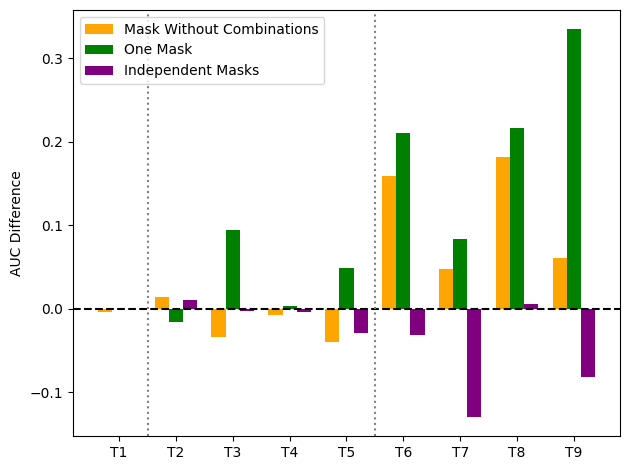

In [28]:
num_values = len(diff_random_all)
x = np.arange(num_values)

width = 0.25
fig, ax = plt.subplots()

ax.bar(x, diff_random_all, width, label="Mask Without Combinations", color='orange')
ax.bar(x + width, diff_big_mask_all, width, label="One Mask", color='green')
ax.bar(x + 2 * width, diff_independent_all, width, label="Independent Masks", color='purple')

# Set x-axis labels for each group
ax.set_xticks(x + width)
ax.set_xticklabels([f'T{i + 1}' for i in range(num_values)])

# Add a horizontal line at y=0
ax.axhline(0, color='black', linestyle='--')
# Add a vertical line to seperate base and complex tasks
ax.axvline(0.75, color='gray', linestyle=':')
ax.axvline(4.75, color='gray', linestyle=':')

# Add legends and labels
ax.legend(loc='upper left')
ax.set_ylabel('AUC Difference')

plt.tight_layout()
plt.savefig("log_safe/comparisons/auc_diff_independent.png")
plt.show()

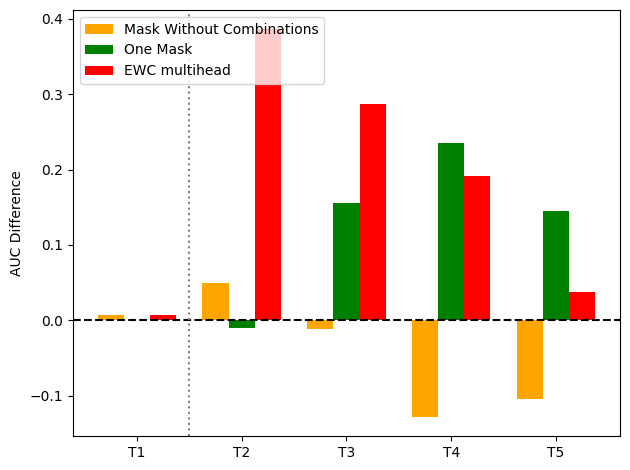

In [36]:
num_values = len(diff_extract_random)
x = np.arange(num_values)

width = 0.25
fig, ax = plt.subplots()

ax.bar(x, diff_extract_random, width, label="Mask Without Combinations", color='orange')
ax.bar(x + width, diff_extract_big_mask, width, label="One Mask", color='green')
ax.bar(x + 2 * width, diff_extract_ewc, width, label="EWC multihead", color='red')

# Set x-axis labels for each group
ax.set_xticks(x + width)
ax.set_xticklabels([f'T{i + 1}' for i in range(num_values)])

# Add a horizontal line at y=0
ax.axhline(0, color='black', linestyle='--')
# Add a vertical line to seperate base and complex tasks
ax.axvline(0.75, color='gray', linestyle=':')

# Add legends and labels
ax.legend(loc='upper left')
ax.set_ylabel('AUC Difference')

plt.tight_layout()
plt.savefig("log_safe/comparisons/auc_diff_extract.png")
plt.show()

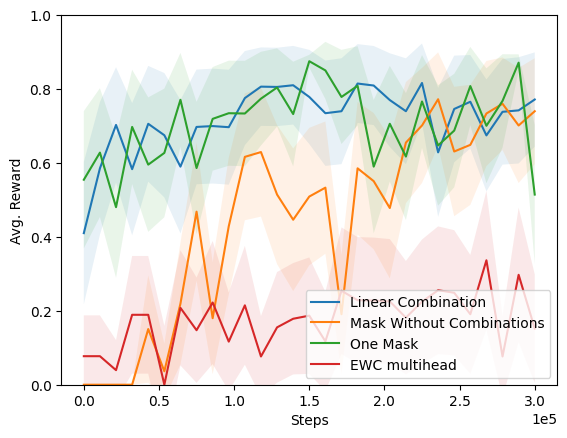

In [7]:
n = 29

comb_values = values_for_task(comb, 3).to_numpy()[:n]
big_mask_values = values_for_task(big_mask, 3).to_numpy()[:n]
random_values = values_for_task(random, 3).to_numpy()[:n]
ewc_values = values_for_task(ewc, 3).to_numpy()[:n]

comb_values_conf = values_for_task(comb_conf, 3).to_numpy()[:n]
big_mask_values_conf = values_for_task(big_mask_conf, 3).to_numpy()[:n]
random_values_conf = values_for_task(random_conf, 3).to_numpy()[:n]
ewc_values_conf = values_for_task(ewc_conf, 3).to_numpy()[:n]

steps = np.linspace(0, 300000, n)

plt.plot(steps, comb_values, label="Linear Combination")
plt.plot(steps, random_values, label="Mask Without Combinations")
plt.plot(steps, big_mask_values, label="One Mask")
plt.plot(steps, ewc_values, label="EWC multihead")

plt.fill_between(steps, (comb_values-comb_values_conf), (comb_values+comb_values_conf), alpha=.1)
plt.fill_between(steps, (random_values-random_values_conf), (random_values+random_values_conf), alpha=.1)
plt.fill_between(steps, (big_mask_values-big_mask_values_conf), (big_mask_values+big_mask_values_conf), alpha=.1)
plt.fill_between(steps, (ewc_values-ewc_values_conf), (ewc_values+ewc_values_conf), alpha=.1)

plt.xlabel("Steps")
plt.ylabel("Avg. Reward")
plt.ylim(bottom=0, top=1)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(loc='lower right')
plt.savefig("log_safe/comparisons/plot_small_comp.png")
plt.show()

/home/matthias/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2343: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/matthias/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2344: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


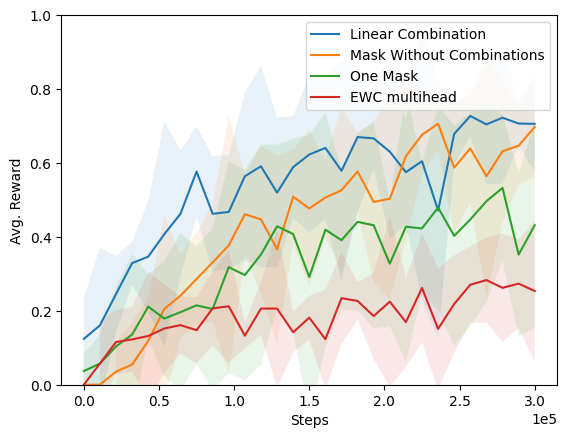

In [5]:
n = 29

comb_all_values = np.zeros((n, 4))
random_all_values = np.zeros((n, 4))
big_mask_all_values = np.zeros((n, 4))
ewc_all_values = np.zeros((n, 4))
for i in range(5, 9):
    comb_all_values[:, i - 5] = values_for_task(comb_all, i).to_numpy()[:n]
    random_all_values[:, i - 5] = values_for_task(random_all, i).to_numpy()[:n]
    big_mask_all_values[:, i - 5] = values_for_task(big_mask_all, i).to_numpy()[:n]
    ewc_all_values[:, i - 5] = values_for_task(ewc_all, i).to_numpy()[:n]

comb_all_values_mean = comb_all_values.mean(axis=1)
random_all_values_mean = random_all_values.mean(axis=1)
big_mask_all_values_mean = big_mask_all_values.mean(axis=1)
ewc_all_values_mean = ewc_all_values.mean(axis=1)

comb_all_values_conf_lower = np.zeros((n,))
random_all_values_conf_lower = np.zeros((n,))
big_mask_all_values_conf_lower = np.zeros((n,))
ewc_all_values_conf_lower = np.zeros((n,))

comb_all_values_conf_upper = np.zeros((n,))
random_all_values_conf_upper = np.zeros((n,))
big_mask_all_values_conf_upper = np.zeros((n,))
ewc_all_values_conf_upper = np.zeros((n,))

for i in range(n):
    comb_all_values_conf_lower[i], comb_all_values_conf_upper[i] = st.t.interval(0.95, comb_all_values.shape[1]-1, loc=comb_all_values_mean[i], scale=st.sem(comb_all_values[i, :]))
    random_all_values_conf_lower[i], random_all_values_conf_upper[i] = st.t.interval(0.95, random_all_values.shape[1]-1, loc=random_all_values_mean[i], scale=st.sem(random_all_values[i, :]))
    big_mask_all_values_conf_lower[i], big_mask_all_values_conf_upper[i] = st.t.interval(0.95, big_mask_all_values.shape[1]-1, loc=big_mask_all_values_mean[i], scale=st.sem(big_mask_all_values[i, :]))
    ewc_all_values_conf_lower[i], ewc_all_values_conf_upper[i] = st.t.interval(0.95, ewc_all_values.shape[1]-1, loc=ewc_all_values_mean[i], scale=st.sem(ewc_all_values[i, :]))

steps = np.linspace(0, 300000, n)

plt.plot(steps, comb_all_values_mean, label="Linear Combination")
plt.plot(steps, random_all_values_mean, label="Mask Without Combinations")
plt.plot(steps, big_mask_all_values_mean, label="One Mask")
plt.plot(steps, ewc_all_values_mean, label="EWC multihead")

plt.fill_between(steps, comb_all_values_conf_lower, comb_all_values_conf_upper, alpha=.1)
plt.fill_between(steps, random_all_values_conf_lower, random_all_values_conf_upper, alpha=.1)
plt.fill_between(steps, big_mask_all_values_conf_lower, big_mask_all_values_conf_upper, alpha=.1)
plt.fill_between(steps, ewc_all_values_conf_lower, ewc_all_values_conf_upper, alpha=.1)

plt.xlabel("Steps")
plt.ylabel("Avg. Reward")
plt.ylim(bottom=0, top=1)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend()
plt.savefig("log_safe/comparisons/plot_big_comp.png")
plt.show()

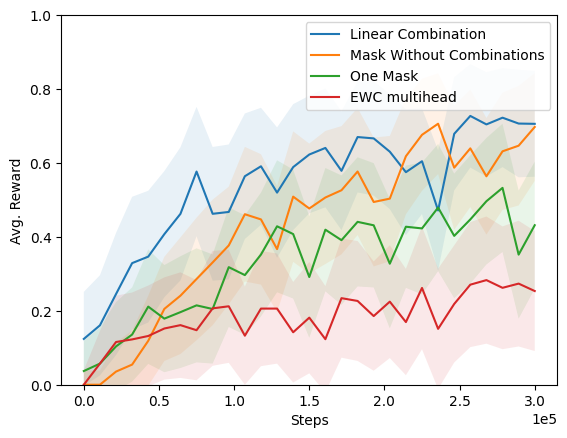

In [40]:
n = 29

comb_all_values = np.zeros((n, 4))
random_all_values = np.zeros((n, 4))
big_mask_all_values = np.zeros((n, 4))
ewc_all_values = np.zeros((n, 4))
for i in range(5, 9):
    comb_all_values[:, i - 5] = values_for_task(comb_all, i).to_numpy()[:n]
    random_all_values[:, i - 5] = values_for_task(random_all, i).to_numpy()[:n]
    big_mask_all_values[:, i - 5] = values_for_task(big_mask_all, i).to_numpy()[:n]
    ewc_all_values[:, i - 5] = values_for_task(ewc_all, i).to_numpy()[:n]

comb_all_values_mean = comb_all_values.mean(axis=1)
random_all_values_mean = random_all_values.mean(axis=1)
big_mask_all_values_mean = big_mask_all_values.mean(axis=1)
ewc_all_values_mean = ewc_all_values.mean(axis=1)

comb_all_sem_values = np.zeros((n, 4))
random_all_sem_values = np.zeros((n, 4))
big_mask_all_sem_values = np.zeros((n, 4))
ewc_all_sem_values = np.zeros((n, 4))
for i in range(5, 9):
    comb_all_sem_values[:, i - 5] = values_for_task(comb_all_sem, i).to_numpy()[:n]
    random_all_sem_values[:, i - 5] = values_for_task(random_all_sem, i).to_numpy()[:n]
    big_mask_all_sem_values[:, i - 5] = values_for_task(big_mask_all_sem, i).to_numpy()[:n]
    ewc_all_sem_values[:, i - 5] = values_for_task(ewc_all_sem, i).to_numpy()[:n]

comb_all_sem_values = np.sqrt(np.square(comb_all_sem_values).mean(axis=1))
random_all_sem_values = np.sqrt(np.square(random_all_sem_values).mean(axis=1))
big_mask_all_sem_values = np.sqrt(np.square(big_mask_all_sem_values).mean(axis=1))
ewc_all_sem_values = np.sqrt(np.square(ewc_all_sem_values).mean(axis=1))

comb_all_values_conf_lower = np.zeros((n,))
random_all_values_conf_lower = np.zeros((n,))
big_mask_all_values_conf_lower = np.zeros((n,))
ewc_all_values_conf_lower = np.zeros((n,))

comb_all_values_conf_upper = np.zeros((n,))
random_all_values_conf_upper = np.zeros((n,))
big_mask_all_values_conf_upper = np.zeros((n,))
ewc_all_values_conf_upper = np.zeros((n,))

for i in range(n):
    comb_all_values_conf_lower[i], comb_all_values_conf_upper[i] = st.t.interval(0.95, (24 * 4) - 1, loc=comb_all_values_mean[i], scale=comb_all_sem_values[i])
    random_all_values_conf_lower[i], random_all_values_conf_upper[i] = st.t.interval(0.95, (24 * 4) - 1, loc=random_all_values_mean[i], scale=random_all_sem_values[i])
    big_mask_all_values_conf_lower[i], big_mask_all_values_conf_upper[i] = st.t.interval(0.95, (24 * 4) - 1, loc=big_mask_all_values_mean[i], scale=big_mask_all_sem_values[i])
    ewc_all_values_conf_lower[i], ewc_all_values_conf_upper[i] = st.t.interval(0.95, (24 * 4) - 1, loc=ewc_all_values_mean[i], scale=ewc_all_sem_values[i])

steps = np.linspace(0, 300000, n)

plt.plot(steps, comb_all_values_mean, label="Linear Combination")
plt.plot(steps, random_all_values_mean, label="Mask Without Combinations")
plt.plot(steps, big_mask_all_values_mean, label="One Mask")
plt.plot(steps, ewc_all_values_mean, label="EWC multihead")

plt.fill_between(steps, comb_all_values_conf_lower, comb_all_values_conf_upper, alpha=.1)
plt.fill_between(steps, random_all_values_conf_lower, random_all_values_conf_upper, alpha=.1)
plt.fill_between(steps, big_mask_all_values_conf_lower, big_mask_all_values_conf_upper, alpha=.1)
plt.fill_between(steps, ewc_all_values_conf_lower, ewc_all_values_conf_upper, alpha=.1)

plt.xlabel("Steps")
plt.ylabel("Avg. Reward")
plt.ylim(bottom=0, top=1)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend()
# plt.savefig("log_safe/comparisons/plot_big_comp.png")
plt.show()

In [37]:
comb_all_sem = pd.read_csv("log_safe/minigrid_green_blue-42-mask-linear_comb/230706-153712/sem_data.csv", header=None)

comb_all_sem_values = np.zeros((n, 4))
for i in range(5, 9):
    comb_all_sem_values[:, i - 5] = values_for_task(comb_all_sem, i).to_numpy()[:n]

a = np.square(comb_all_sem_values).sum(axis=1)
np.sqrt(a / 4)

array([0.0641239 , 0.06821908, 0.08318827, 0.0904182 , 0.08975404,
       0.08589804, 0.0907136 , 0.08815133, 0.09105177, 0.09195759,
       0.08552564, 0.07975276, 0.08885241, 0.08575666, 0.08016528,
       0.08089051, 0.08078795, 0.07550503, 0.07790677, 0.07827456,
       0.08580321, 0.07199212, 0.08201985, 0.07703483, 0.07040336,
       0.07102616, 0.0673608 , 0.07327363, 0.07206098])

In [38]:
(comb_all_values_mean - comb_all_values_conf_lower)

array([0.13667686, 0.14540552, 0.17731159, 0.19272182, 0.19130621,
       0.18308733, 0.19335146, 0.18789012, 0.19407226, 0.19600295,
       0.18229359, 0.16998898, 0.18938442, 0.182786  , 0.17086825,
       0.17241405, 0.17219543, 0.16093517, 0.16605435, 0.16683829,
       0.1828852 , 0.15344757, 0.17482116, 0.16419585, 0.1500612 ,
       0.15138867, 0.14357615, 0.15617905, 0.15359435])

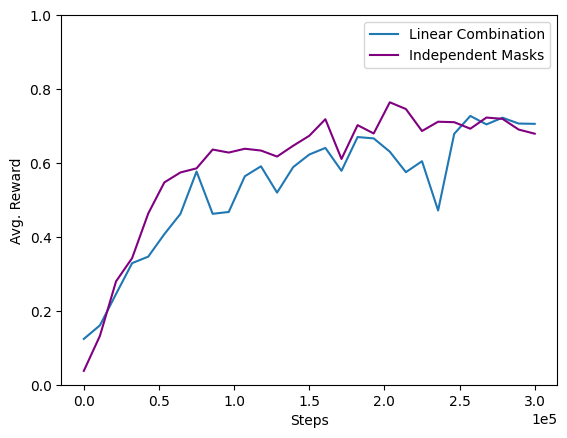

In [10]:
n = 29

comb_all_values = np.zeros((n,))
independent_all_values = np.zeros((n,))
for i in range(5, 9):
    comb_all_values += values_for_task(comb_all, i).to_numpy()[:n]
    independent_all_values += values_for_task(independent_all, i).to_numpy()[:n]

comb_all_values /= 4
independent_all_values /= 4

steps = np.linspace(0, 300000, n)

plt.plot(steps, comb_all_values, label="Linear Combination")
plt.plot(steps, independent_all_values, label="Independent Masks", color='purple')

plt.xlabel("Steps")
plt.ylabel("Avg. Reward")
plt.ylim(bottom=0, top=1)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend()
plt.savefig("log_safe/comparisons/plot_independent_comp.png")
plt.show()

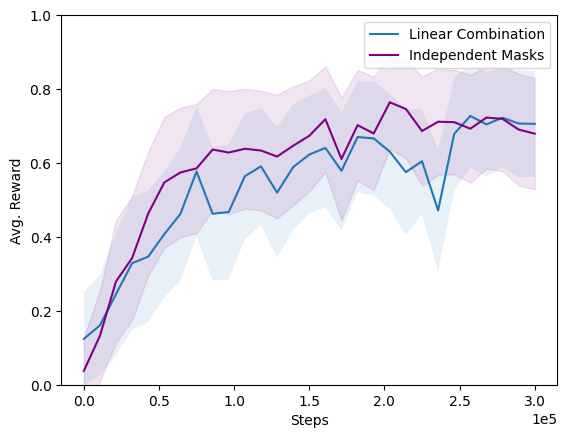

In [15]:
n = 29

comb_all_values = np.zeros((n, 4))
independent_all_values = np.zeros((n, 4))
for i in range(5, 9):
    comb_all_values[:, i - 5] = values_for_task(comb_all, i).to_numpy()[:n]
    independent_all_values[:, i - 5] = values_for_task(independent_all, i).to_numpy()[:n]

comb_all_values_mean = comb_all_values.mean(axis=1)
independent_all_values_mean = independent_all_values.mean(axis=1)

comb_all_sem_values = np.zeros((n, 4))
independent_all_sem_values = np.zeros((n, 4))
for i in range(5, 9):
    comb_all_sem_values[:, i - 5] = values_for_task(comb_all_sem, i).to_numpy()[:n]
    independent_all_sem_values[:, i - 5] = values_for_task(independent_all_sem, i).to_numpy()[:n]

comb_all_sem_values = np.sqrt(np.square(comb_all_sem_values).mean(axis=1))
independent_all_sem_values = np.sqrt(np.square(independent_all_sem_values).mean(axis=1))

comb_all_values_conf_lower = np.zeros((n,))
independent_all_values_conf_lower = np.zeros((n,))

comb_all_values_conf_upper = np.zeros((n,))
independent_all_values_conf_upper = np.zeros((n,))

for i in range(n):
    comb_all_values_conf_lower[i], comb_all_values_conf_upper[i] = st.t.interval(0.95, (24 * 4) - 1, loc=comb_all_values_mean[i], scale=comb_all_sem_values[i])
    independent_all_values_conf_lower[i], independent_all_values_conf_upper[i] = st.t.interval(0.95, (24 * 4) - 1, loc=independent_all_values_mean[i], scale=independent_all_sem_values[i])

steps = np.linspace(0, 300000, n)

plt.plot(steps, comb_all_values_mean, label="Linear Combination")
plt.plot(steps, independent_all_values_mean, label="Independent Masks", color='purple')

plt.fill_between(steps, comb_all_values_conf_lower, comb_all_values_conf_upper, alpha=.1)
plt.fill_between(steps, independent_all_values_conf_lower, independent_all_values_conf_upper, alpha=.1, color='purple')

plt.xlabel("Steps")
plt.ylabel("Avg. Reward")
plt.ylim(bottom=0, top=1)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend()
plt.savefig("log_safe/comparisons/plot_independent_comp.png")
plt.show()

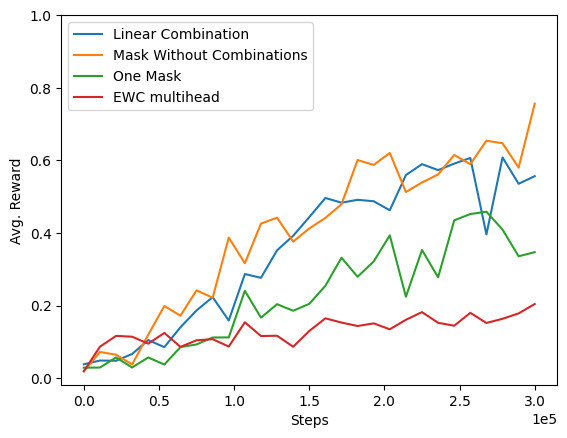

In [ ]:
n = 29

comb_extract_values = np.zeros((n,))
random_extract_values = np.zeros((n,))
big_mask_extract_values = np.zeros((n,))
ewc_extract_values = np.zeros((n,))
for i in range(1, 5):
    comb_extract_values += values_for_task(extract_comb, i).to_numpy()[:n]
    random_extract_values += values_for_task(extract_random, i).to_numpy()[:n]
    big_mask_extract_values += values_for_task(extract_big_mask, i).to_numpy()[:n]
    ewc_extract_values += values_for_task(extract_ewc, i).to_numpy()[:n]

comb_extract_values /= 4
random_extract_values /= 4
big_mask_extract_values /= 4
ewc_extract_values /= 4

steps = np.linspace(0, 300000, n)

plt.plot(steps, comb_extract_values, label="Linear Combination")
plt.plot(steps, random_extract_values, label="Mask Without Combinations")
plt.plot(steps, big_mask_extract_values, label="One Mask")
plt.plot(steps, ewc_extract_values, label="EWC multihead")

plt.xlabel("Steps")
plt.ylabel("Avg. Reward")
plt.ylim(top=1)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend()
plt.savefig("log_safe/comparisons/plot_extract_comp.png")
plt.show()

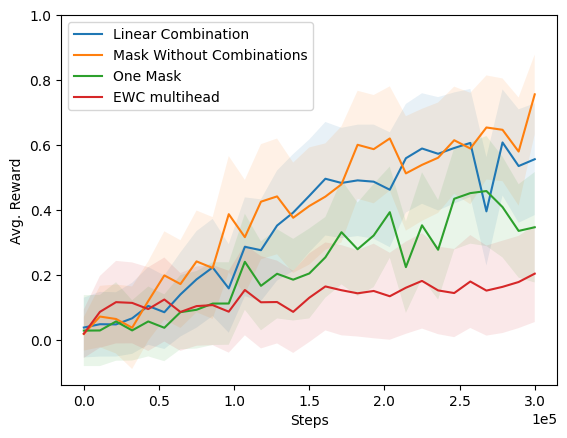

In [20]:
n = 29

extract_comb_values = np.zeros((n, 4))
extract_random_values = np.zeros((n, 4))
extract_big_mask_values = np.zeros((n, 4))
extract_ewc_values = np.zeros((n, 4))
for i in range(1, 5):
    extract_comb_values[:, i - 1] = values_for_task(extract_comb, i).to_numpy()[:n]
    extract_random_values[:, i - 1] = values_for_task(extract_random, i).to_numpy()[:n]
    extract_big_mask_values[:, i - 1] = values_for_task(extract_big_mask, i).to_numpy()[:n]
    extract_ewc_values[:, i - 1] = values_for_task(extract_ewc, i).to_numpy()[:n]

extract_comb_values_mean = extract_comb_values.mean(axis=1)
extract_random_values_mean = extract_random_values.mean(axis=1)
extract_big_mask_values_mean = extract_big_mask_values.mean(axis=1)
extract_ewc_values_mean = extract_ewc_values.mean(axis=1)

extract_comb_sem_values = np.zeros((n, 4))
extract_random_sem_values = np.zeros((n, 4))
extract_big_mask_sem_values = np.zeros((n, 4))
extract_ewc_sem_values = np.zeros((n, 4))
for i in range(1, 5):
    extract_comb_sem_values[:, i - 1] = values_for_task(extract_comb_sem, i).to_numpy()[:n]
    extract_random_sem_values[:, i - 1] = values_for_task(extract_random_sem, i).to_numpy()[:n]
    extract_big_mask_sem_values[:, i - 1] = values_for_task(extract_big_mask_sem, i).to_numpy()[:n]
    extract_ewc_sem_values[:, i - 1] = values_for_task(extract_ewc_sem, i).to_numpy()[:n]

extract_comb_sem_values = np.sqrt(np.square(extract_comb_sem_values).mean(axis=1))
extract_random_sem_values = np.sqrt(np.square(extract_random_sem_values).mean(axis=1))
extract_big_mask_sem_values = np.sqrt(np.square(extract_big_mask_sem_values).mean(axis=1))
extract_ewc_sem_values = np.sqrt(np.square(extract_ewc_sem_values).mean(axis=1))

extract_comb_values_conf_lower = np.zeros((n,))
extract_random_values_conf_lower = np.zeros((n,))
extract_big_mask_values_conf_lower = np.zeros((n,))
extract_ewc_values_conf_lower = np.zeros((n,))

extract_comb_values_conf_upper = np.zeros((n,))
extract_random_values_conf_upper = np.zeros((n,))
extract_big_mask_values_conf_upper = np.zeros((n,))
extract_ewc_values_conf_upper = np.zeros((n,))

for i in range(n):
    extract_comb_values_conf_lower[i], extract_comb_values_conf_upper[i] = st.t.interval(0.95, (24 * 4) - 1, loc=extract_comb_values_mean[i], scale=extract_comb_sem_values[i])
    extract_random_values_conf_lower[i], extract_random_values_conf_upper[i] = st.t.interval(0.95, (24 * 4) - 1, loc=extract_random_values_mean[i], scale=extract_random_sem_values[i])
    extract_big_mask_values_conf_lower[i], extract_big_mask_values_conf_upper[i] = st.t.interval(0.95, (24 * 4) - 1, loc=extract_big_mask_values_mean[i], scale=extract_big_mask_sem_values[i])
    extract_ewc_values_conf_lower[i], extract_ewc_values_conf_upper[i] = st.t.interval(0.95, (24 * 4) - 1, loc=extract_ewc_values_mean[i], scale=extract_ewc_sem_values[i])

steps = np.linspace(0, 300000, n)

plt.plot(steps, extract_comb_values_mean, label="Linear Combination")
plt.plot(steps, extract_random_values_mean, label="Mask Without Combinations")
plt.plot(steps, extract_big_mask_values_mean, label="One Mask")
plt.plot(steps, extract_ewc_values_mean, label="EWC multihead")

plt.fill_between(steps, extract_comb_values_conf_lower, extract_comb_values_conf_upper, alpha=.1)
plt.fill_between(steps, extract_random_values_conf_lower, extract_random_values_conf_upper, alpha=.1)
plt.fill_between(steps, extract_big_mask_values_conf_lower, extract_big_mask_values_conf_upper, alpha=.1)
plt.fill_between(steps, extract_ewc_values_conf_lower, extract_ewc_values_conf_upper, alpha=.1)

plt.xlabel("Steps")
plt.ylabel("Avg. Reward")
plt.ylim(top=1)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend()
plt.savefig("log_safe/comparisons/plot_extract_comp.png")
plt.show()

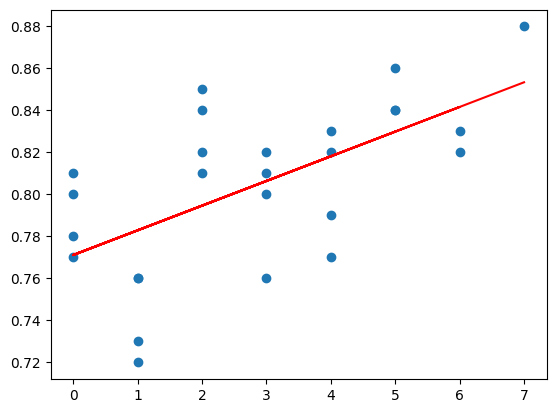

In [ ]:
sim_scores = [[0.81,  0.76,  0.82,  0.82,  0.79],
              [0.77, 0.73, 0.81, 0.80, 0.77, 0.84], 
              [0.78, 0.76, 0.85, 0.81, 0.83, 0.86, 0.82], 
              [0.80, 0.72, 0.84, 0.76, 0.82, 0.84, 0.83, 0.88]]

y = []
x = []

for scores in sim_scores:
    y.extend(scores)
    x.extend(np.arange(len(scores)).tolist())

y = np.array(y)
x = np.array(x)

# Calculate linear regression line
slope, intercept = np.polyfit(x, y, 1)
linear_reg_line = slope * x + intercept

# Create scatter plot
plt.scatter(x, y, label='Data Points')

# Plot the linear regression line
plt.plot(x, linear_reg_line, color='red', label='Linear Regression Line')